In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

Median Price of Existing Single Family Homes from California Association of Realtors (CAR)
[https://www.car.org/marketdata/data/housingdata]

In [4]:
# Load historical dataset downloaded from CAR

california_housing = pd.read_excel('sample_data/MedianPricesofExistingDetachedHomesHistoricalData.xls', header=[7])

In [23]:
california_housing.head(5)

,Mon-Yr,CA,Alameda,Amador,Butte,Calaveras,Contra-Costa,Del Norte,El Dorado,Fresno,...,Tehama,Tulare,Tuolumne,Ventura,Yolo,Yuba,Unnamed: 53,Los Angeles Metropolitan Area,S.F. Bay Area,Inland Empire
0,1990-01-01,194952.0,226148.902299,NaN,102142.75,NaN,NaN,NaN,NaN,82083.125000,...,NaN,86999.300000,NaN,250410.0,NaN,NaN,NaN,203389.543331,227365.834348,NaN
1,1990-02-01,196273.0,219306.000000,NaN,83333.00,NaN,NaN,NaN,NaN,87186.781250,...,NaN,84374.562500,NaN,235760.0,NaN,NaN,NaN,211024.114600,234739.457236,NaN
2,1990-03-01,194856.0,225162.000000,NaN,100000.00,NaN,NaN,NaN,NaN,83888.500000,...,NaN,84210.105263,NaN,240320.0,NaN,NaN,NaN,209286.092622,235336.501496,NaN
3,1990-04-01,196111.0,229333.000000,NaN,107999.60,NaN,NaN,NaN,NaN,85428.028571,...,NaN,88927.678571,NaN,230620.0,NaN,NaN,NaN,210301.589421,233178.496107,NaN
4,1990-05-01,195281.0,232291.000000,NaN,100000.00,NaN,NaN,NaN,NaN,88749.125000,...,NaN,85999.400000,NaN,235320.0,NaN,NaN,NaN,210147.747929,235881.361604,NaN


In [24]:
california_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 57 columns):
Mon-Yr                           357 non-null datetime64[ns]
CA                               357 non-null float64
Alameda                          357 non-null float64
Amador                           187 non-null float64
Butte                            357 non-null float64
Calaveras                        225 non-null float64
Contra-Costa                     165 non-null float64
Del Norte                        129 non-null float64
El Dorado                        129 non-null float64
Fresno                           357 non-null float64
Glenn                            165 non-null float64
Humboldt                         357 non-null float64
Kern                             357 non-null int64
Kings                            165 non-null float64
Lake                             309 non-null float64
Lassen                           45 non-null float64
Los Angeles                

In [25]:
# Find min and max dates recorded

california_housing['Mon-Yr'].describe()

count                     357
unique                    357
top       2009-09-01 00:00:00
freq                        1
first     1990-01-01 00:00:00
last      2019-09-01 00:00:00
Name: Mon-Yr, dtype: object

# Assignment

#### 1_a. Choose one variable and plot that variable four different ways.

In [170]:
alameda_housing = california_housing[['Alameda']]

In [171]:
alameda_housing.head(5)

,Alameda
0,226148.902299
1,219306.000000
2,225162.000000
3,229333.000000
4,232291.000000


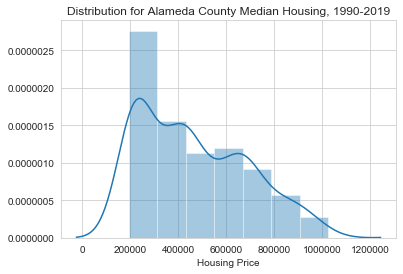

In [148]:
sns.set_style('whitegrid')

sns.distplot(alameda_housing)
plt.xlabel('Housing Price')
plt.title("Distribution for Alameda County Median Housing, 1990-2019");

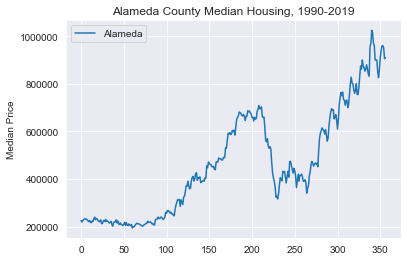

In [149]:
sns.set_style('darkgrid')

sns.lineplot(data=alameda_housing)
plt.ylabel('Median Price')
plt.xlabel('')
plt.title('Alameda County Median Housing, 1990-2019');

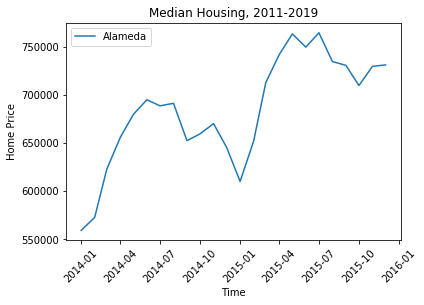

In [10]:
sns.lineplot(data=california_housing.loc[(california_housing['Mon-Yr'].dt.year >= 2014)&(california_housing['Mon-Yr'].dt.year < 2016)]
             .loc[:,['Mon-Yr', 'Alameda']] #, 'Contra-Costa', 'San Francisco', 'San Mateo', 'Santa Clara']]
             .set_index('Mon-Yr'))
plt.ylabel('Home Price')
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.title('Median Housing, 2011-2019');

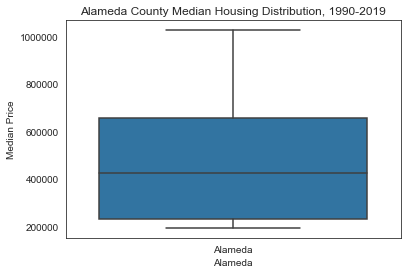

In [150]:
sns.set_style('white')

sns.boxplot(data=alameda_housing)
plt.ylabel('Median Price')
plt.xlabel('Alameda')
plt.title('Alameda County Median Housing Distribution, 1990-2019');

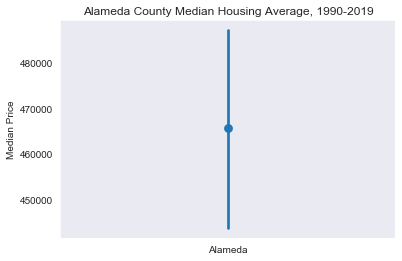

In [152]:
sns.set_style('dark')

sns.pointplot(data=alameda_housing)
plt.ylabel('Median Price')
plt.title('Alameda County Median Housing Average, 1990-2019');

#### 1_b. Choose two continuous variables, and plot them three different ways.

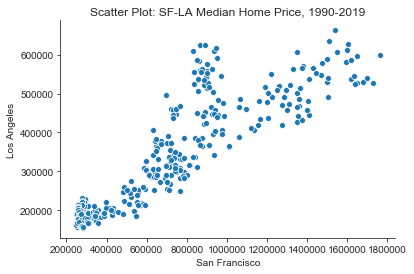

In [69]:
sns.scatterplot(x='San Francisco', y='Los Angeles', data=california_housing)
plt.title('Scatter Plot: SF-LA Median Home Price, 1990-2019')
sns.despine();

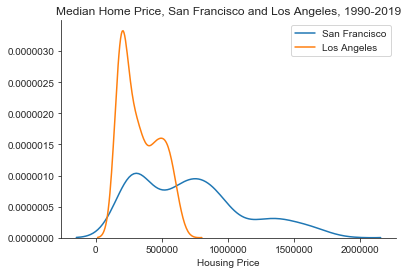

In [66]:
sns.set_style('ticks')

sns.kdeplot(data=california_housing['San Francisco'])
sns.kdeplot(data=california_housing['Los Angeles'])
plt.xlabel('Housing Price')
plt.title('Median Home Price, San Francisco and Los Angeles, 1990-2019')
sns.despine();

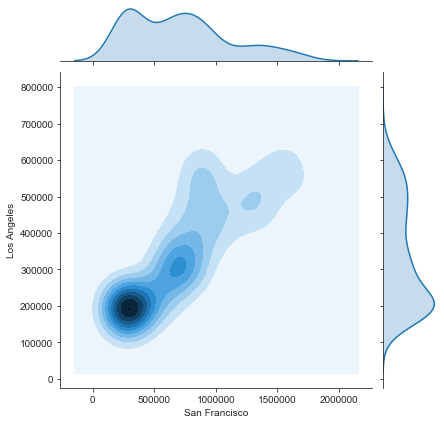

In [71]:
sns.jointplot(x='San Francisco',y='Los Angeles',data=california_housing,kind='kde');

#### 1_c. Choose one continuous variable and one categorical variable, and plot them six different ways.

In [13]:
# Create categorical series by converting datetime column to create month name column

california_housing['Month'] = california_housing['Mon-Yr'].dt.month_name()
california_housing.head(5)

,Mon-Yr,CA,Alameda,Amador,Butte,Calaveras,Contra-Costa,Del Norte,El Dorado,Fresno,...,Tulare,Tuolumne,Ventura,Yolo,Yuba,Unnamed: 53,Los Angeles Metropolitan Area,S.F. Bay Area,Inland Empire,Month
0,1990-01-01,194952.0,226148.902299,NaN,102142.75,NaN,NaN,NaN,NaN,82083.125000,...,86999.300000,NaN,250410.0,NaN,NaN,NaN,203389.543331,227365.834348,NaN,January
1,1990-02-01,196273.0,219306.000000,NaN,83333.00,NaN,NaN,NaN,NaN,87186.781250,...,84374.562500,NaN,235760.0,NaN,NaN,NaN,211024.114600,234739.457236,NaN,February
2,1990-03-01,194856.0,225162.000000,NaN,100000.00,NaN,NaN,NaN,NaN,83888.500000,...,84210.105263,NaN,240320.0,NaN,NaN,NaN,209286.092622,235336.501496,NaN,March
3,1990-04-01,196111.0,229333.000000,NaN,107999.60,NaN,NaN,NaN,NaN,85428.028571,...,88927.678571,NaN,230620.0,NaN,NaN,NaN,210301.589421,233178.496107,NaN,April
4,1990-05-01,195281.0,232291.000000,NaN,100000.00,NaN,NaN,NaN,NaN,88749.125000,...,85999.400000,NaN,235320.0,NaN,NaN,NaN,210147.747929,235881.361604,NaN,May


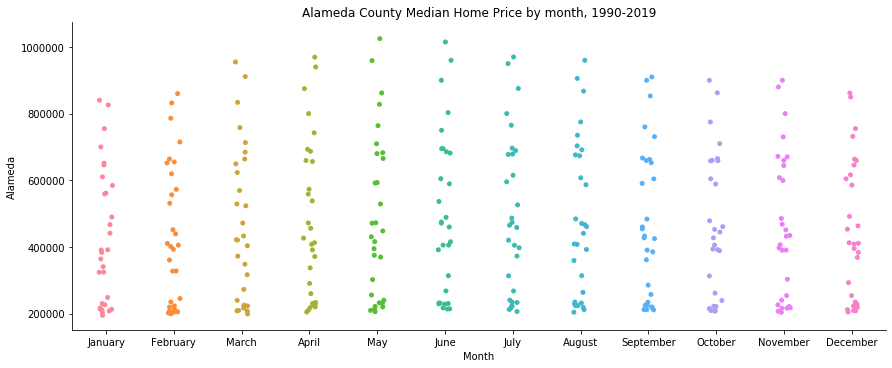

In [14]:
sns.catplot(x='Month', y='Alameda', data=california_housing, aspect=2.5)
plt.title('Alameda County Median Home Price by month, 1990-2019');

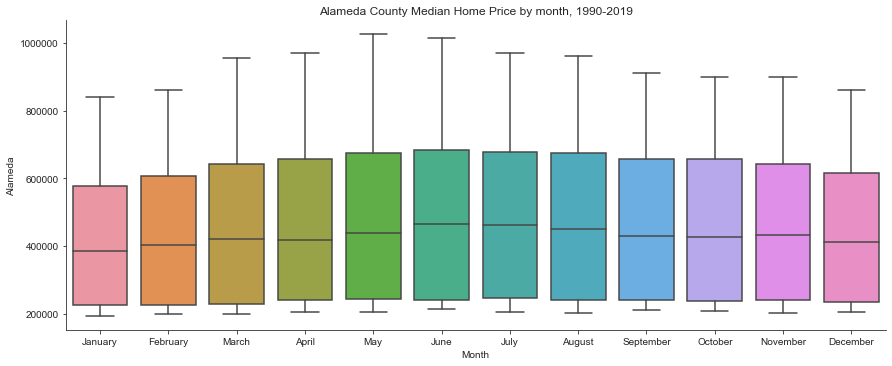

In [75]:
sns.catplot(x='Month',y='Alameda',data=california_housing, kind='box', aspect=2.5)
plt.title('Alameda County Median Home Price by month, 1990-2019');

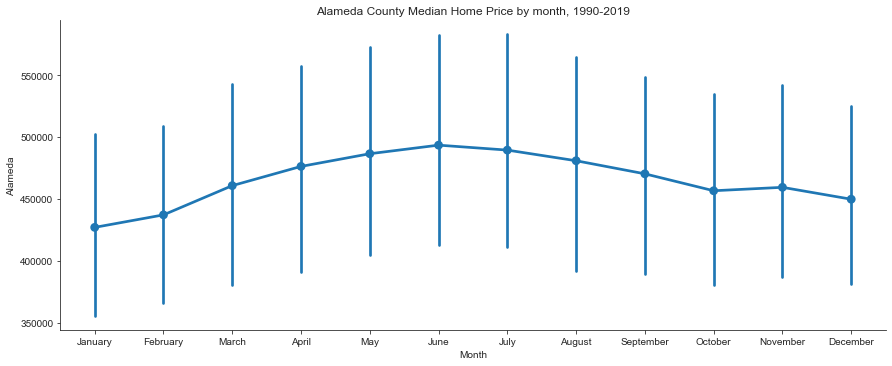

In [76]:
sns.catplot(x='Month',y='Alameda',data=california_housing, kind='point', aspect=2.5)
plt.title('Alameda County Median Home Price by month, 1990-2019');

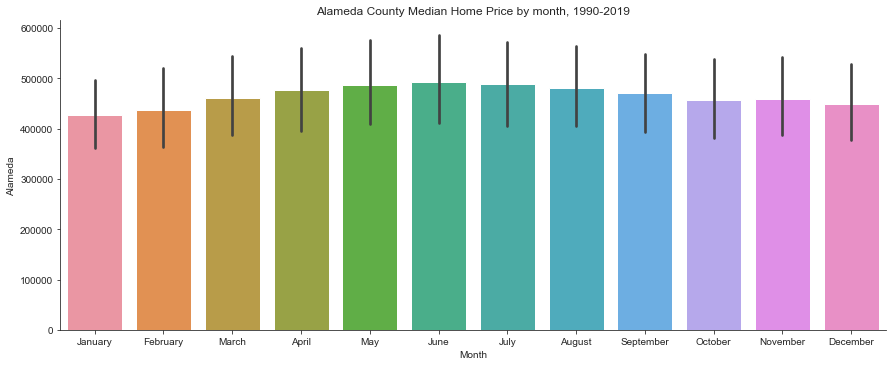

In [77]:
sns.catplot(x='Month',y='Alameda',data=california_housing, kind='bar', aspect=2.5)
plt.title('Alameda County Median Home Price by month, 1990-2019');

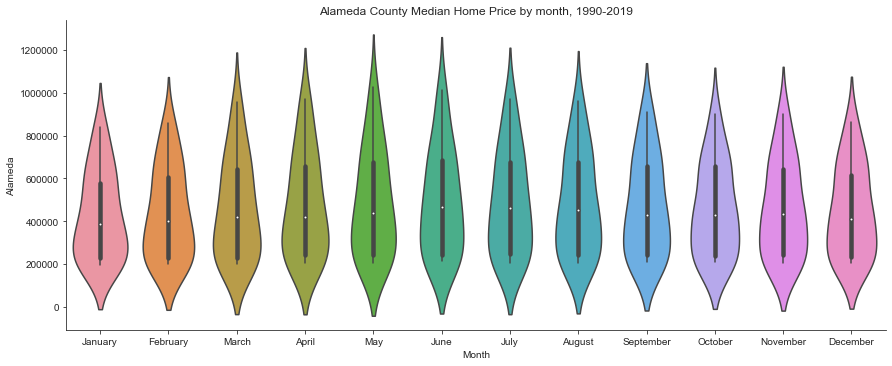

In [124]:
sns.catplot(x='Month',y='Alameda',data=california_housing, kind='violin', aspect=2.5)
plt.title('Alameda County Median Home Price by month, 1990-2019');

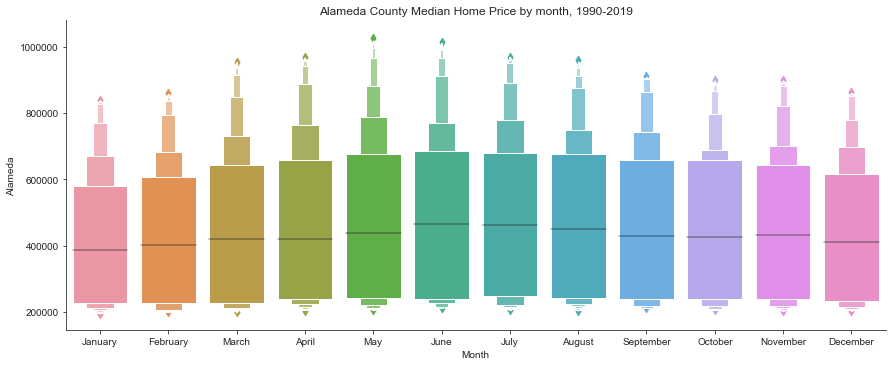

In [125]:
sns.catplot(x='Month',y='Alameda',data=california_housing, kind='boxen', aspect=2.5)
plt.title('Alameda County Median Home Price by month, 1990-2019');

#### 1_d. Give the pros and cons of each plot you create. You can use variables from multiple datasets if you like.

#### 2. Find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:
        
        a. Probability distributions
        b. Bivariate relationships
        c. Whether the distributions or the relationships vary across groups
        d. Accompany your plot with a written description of what you see.

make seasons category

In [140]:
san_francisco_housing = pd.DataFrame()

for column in ['Alameda','Contra-Costa','Marin','Napa','San Francisco','San Mateo','Santa Clara','Solano','Sonoma','Month']:
        san_francisco_housing[column] = california_housing[column]
        
san_francisco_housing.head(5)

,Alameda,Contra-Costa,Marin,Napa,San Francisco,San Mateo,Santa Clara,Solano,Sonoma,Month
0,226148.902299,NaN,346153.0,178888.0,287499,NaN,271840,NaN,174022.0,January
1,219306.000000,NaN,338333.0,186363.0,300877,NaN,273100,NaN,180294.0,February
2,225162.000000,NaN,358571.0,180000.0,290151,NaN,275500,NaN,178823.0,March
3,229333.000000,NaN,359574.0,158571.0,288725,NaN,274660,NaN,184117.0,April
4,232291.000000,NaN,374999.0,187692.0,282626,NaN,266670,NaN,185844.0,May


/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


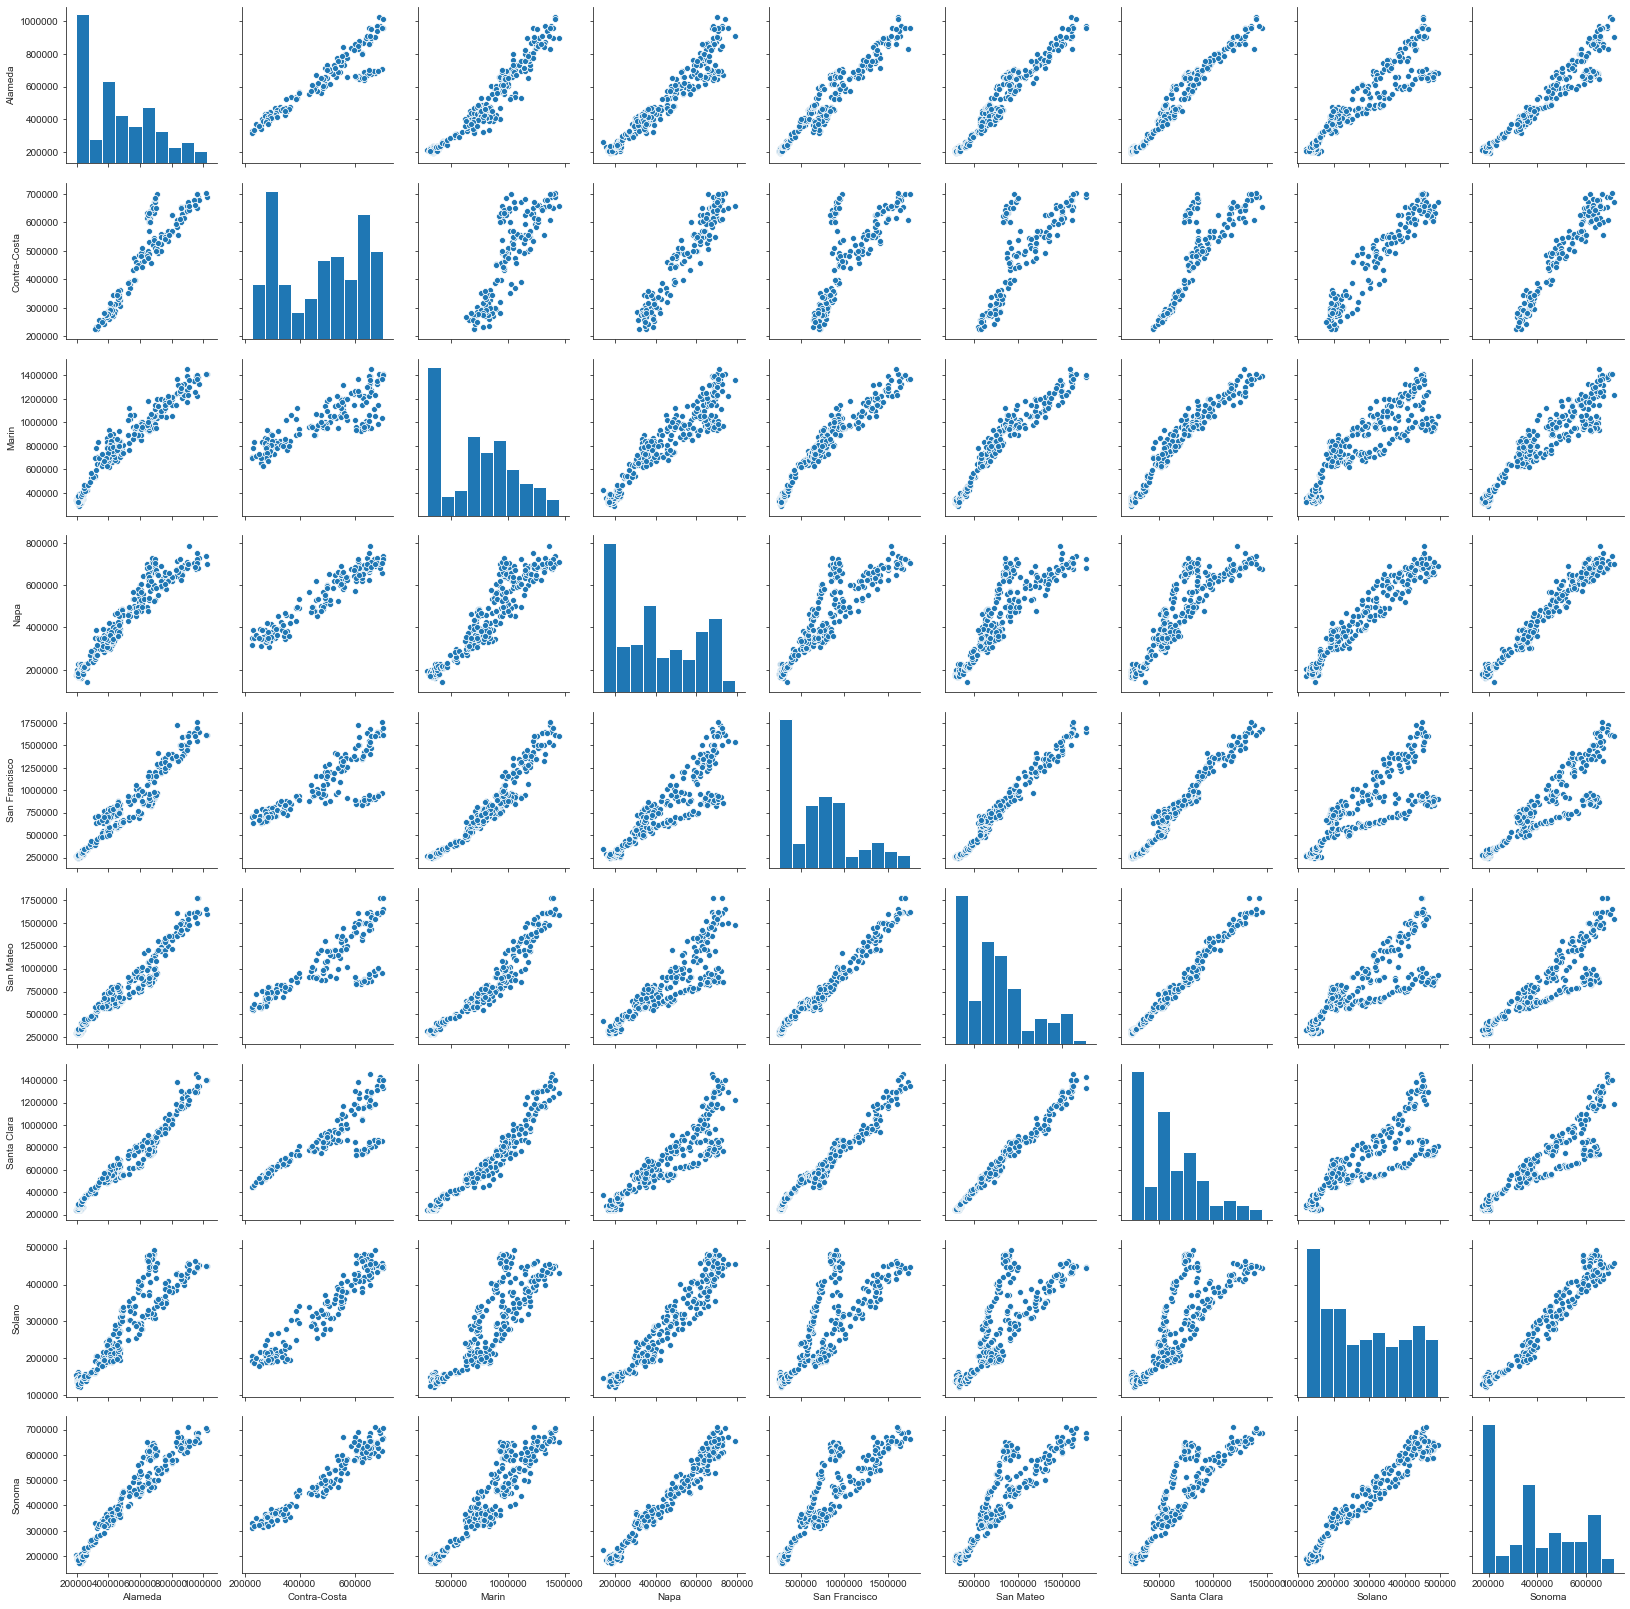

In [141]:
sns.pairplot(data=san_francisco_housing);